<h1><center>Regressão Linear Simple</center></h1>

Nesta aula iremos aprender a como utilizar o scikit-learn para criar uma regressão linear simples com base nos dados de emissão de CO2 de veículos automotores.


# Importando os pacotes necessários

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

# Download dos dados
O download dos dados pode ser realizado por meio do IBM Object Storage, disponível em:

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

##### Obs.: O arquivo deve ser salvo na mesma pasta onde este arquivo estiver salvo.


# Entendendo os dados

### `FuelConsumption.csv`:
Os dados presentes no arquivo, **`FuelConsumption.csv`**, referem-se ao consumo, bem como a emissão de CO2 de veículos vendidos no Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


# Lendo os dados

In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# Exibir o cabeçalho do arquivo
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Explorando os dados
Vamos primeiro obter dados estatísticos descritivos dos nossos dados.

In [8]:
# resumir os dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Vamos selecionar alguns dados para se obter maiores informações.

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


podemos plotar um histograma de cada uma dessas características:

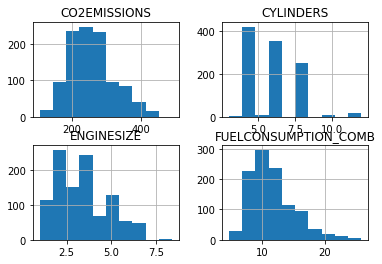

In [10]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Vamos plotar uma dispersão de cada uma dessas características vs Emissão, para verificar quão linear é essa relação:

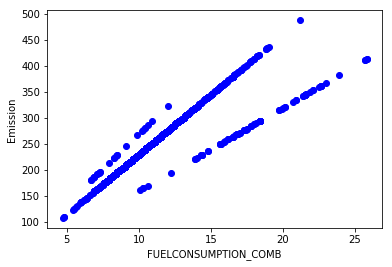

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

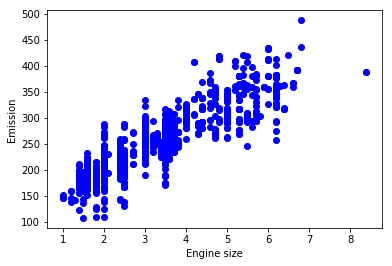

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Prática
plote __CYLINDER__ vs a Emissão, para visualizar se existe a linearidade:

In [ ]:
# Escreva seu código aqui


Duplo-clique __aqui__ para a solução.

<!-- Sua resposta abaixo:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Criando dados de treinamento e de validação
Train/Test Split (Separação de dados para Treinamento/Validação) envolve separar os dados em dois conjuntos distintos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de validação.

Isso fornecerá uma avaliação mais correta da exatidão fora da amostra, porque o conjunto de dados de validação não faz parte do conjunto de dados que foi usado para treinar o modelo. É mais realista para problemas do mundo real.

Isso significa que sabemos o resultado de cada ponto de dados neste conjunto de dados, o que é ótimo para testar! E como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e validação, 80% de todos os dados para treinamento e 20% para validação. Criamos uma máscara para selecionar linhas aleatórias usando a função __np.random.rand () __: 

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Modelo de Regressão Linear Simples
O modelo de regressão linear ajusta um modelo linear com coeficientes $\theta = (\theta_1, ..., \theta_n)$ para minimizar a "soma do erro quadrático" entre a variável independente x e a variável dependente y. 

#### Distribuição dos dados de Treinamento

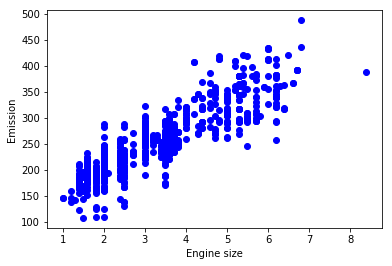

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Criando o modelo
Usando o pacote sklearn para gerar o modelo.

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# Os coeficientes
print ('Coeficiente angular: ', regr.coef_)
print ('Intercepto: ',regr.intercept_)

Coeficiente angular:  [[39.77938503]]
Intercepto:  [123.21122305]


Como mencionado anteriormente, __Coeficiente__ e __Intercepto__ na regressão linear simples, são os parâmetros da linha de ajuste.
Dado que se trata de uma regressão linear simples, com apenas 2 parâmetros, e sabendo que os parâmetros são o intercepto e a inclinação da reta, o sklearn pode estimar diretamente a partir de nossos dados.
Observe que todos os dados devem estar disponíveis para percorrer e calcular os parâmetros.

#### Plotando as saídas

podemos plotar a reta sobre os pontos:

Text(0, 0.5, 'Emission')

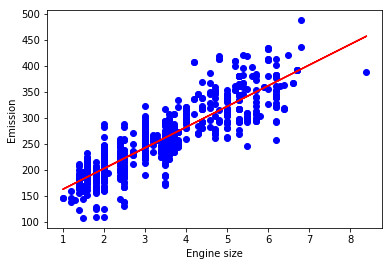

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Validação
nós comparamos os valores reais e os valores estimados para calcular a precisão de um modelo de regressão. As métricas de avaliação fornecem um papel fundamental no desenvolvimento de um modelo, pois fornece insights para áreas que exigem melhorias.

Existem diferentes métricas de avaliação de modelo, vamos usar o MSE (Erro Quadrático Médio) aqui para calcular a precisão do nosso modelo com base no conjunto de testes:
<ul>
    <li> Erro absoluto médio: é a média do valor absoluto dos erros. Essa é a maneira mais fácil de entender as métricas, pois é apenas um erro médio.</li>
<li>Erro Quadrático Médio (MSE): Erro Quadrático Médio (MSE) é a média do erro quadrado. É mais popular do que o erro absoluto médio porque o foco é voltado mais para erros grandes. Isso se deve ao fato de o termo ao quadrado aumentar exponencialmente os erros maiores em comparação com os menores.</li>
<li>Raiz do Erro Quadrático Médio (RMSE): Esta é a raiz quadrada do Erro Quadrático Médio.</li>
    </ul>
R-quadrado não é um erro, mas é uma métrica popular para precisão do seu modelo. Representa o quão próximos os dados estão da linha de regressão ajustada. Quanto maior o R-quadrado, melhor o modelo se adapta aos seus dados. A melhor pontuação possível é 1.0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.


In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.18
Residual sum of squares (MSE): 922.32
R2-score: 0.71


Esta aula foi desenvolvida com base no material disponibilizado por Saeed Aghabozorgi

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>